In [1]:
import torchvision
import torch.nn as nn
from torchvision.utils import save_image, make_grid
import json
# from src.model import Net
import os
import torch
import matplotlib.pyplot as plt
import numpy as np

/home/xiaochen/anaconda3/envs/IFv2/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
os.chdir("/home/xiaochen/kewen/IF_project")

In [3]:

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                        download=True)
                                

In [4]:
def _subsample_by_classes(all_examples, labels, num_per_class=None):
    if num_per_class is None:
        return all_examples

    examples = {label: [] for label in labels}
    for example in all_examples:
        if example[1] in labels:
            examples[example[1]].append(example)

    picked_examples = []
    for label in labels:
        examples_with_label = examples[label][:num_per_class[label]]
        picked_examples.extend(examples_with_label)

        print(f'number of examples with label \'{label}\': '
            f'{len(examples_with_label)}')

    return picked_examples

In [5]:
trainset_sampled = _subsample_by_classes(trainset, [0,1,2,3,4,5,6,7,8,9], [100]*10)

number of examples with label '0': 100
number of examples with label '1': 100
number of examples with label '2': 100
number of examples with label '3': 100
number of examples with label '4': 100
number of examples with label '5': 100
number of examples with label '6': 100
number of examples with label '7': 100
number of examples with label '8': 100
number of examples with label '9': 100


In [59]:
dev_id_num = 1

In [60]:
truth_path = f'outputs/mnist/MNIST_1/dev_id_{dev_id_num}/Percy.json'

In [61]:
# JSON file
with open (truth_path, "r") as f:
     data_true = json.loads(f.read())


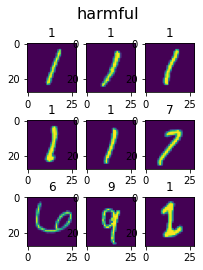

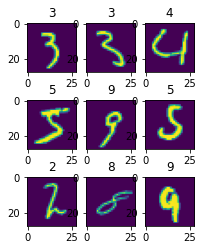

In [62]:
fig = plt.figure(figsize=(3, 4))
fig.suptitle('helpful', fontsize=16)
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(trainset_sampled[data_true['helpful'][i]][0])
    plt.title(trainset_sampled[data_true['helpful'][i]][1])
fig.suptitle('harmful', fontsize=16)
fig = plt.figure(figsize=(3, 4))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(trainset_sampled[data_true['harmful'][i]][0])
    plt.title(trainset_sampled[data_true['harmful'][i]][1])

In [63]:
def draw_target(path):
    target_path = path
    with open (target_path, "r") as f:
         data_target = json.loads(f.read())
    fig = plt.figure(figsize=(3, 4))
    fig.suptitle('helpful', fontsize=16)
    for i in range(1,10):
        fig.add_subplot(3,3,i)
        plt.imshow(trainset_sampled[data_target['helpful'][i]][0])
        plt.title(trainset_sampled[data_target['helpful'][i]][1])
    fig = plt.figure(figsize=(3, 4))
    fig.suptitle('harmful', fontsize=16)
    for i in range(1,10):
        fig.add_subplot(3,3,i)
        plt.imshow(trainset_sampled[data_target['harmful'][i]][0])
        plt.title(trainset_sampled[data_target['harmful'][i]][1])
    plt.show()
    plt.clf()
    x =  np.array(data_true['influence'])
    y = np.array(data_target['influence'])
    Correlation = round(np.corrcoef(x,y)[0,1],3)
    plt.scatter(y,x)
    plt.title(f"correlation {Correlation}")
    plt.show()

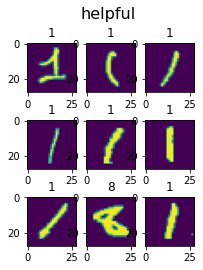

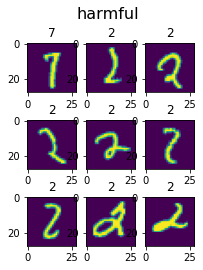

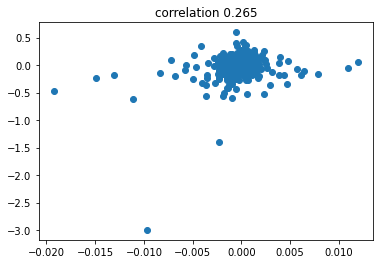

In [64]:
draw_target(f'outputs/mnist/MNIST_1/dev_id_{dev_id_num}/first_iteration_grad.json')

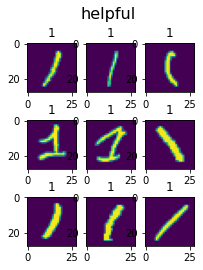

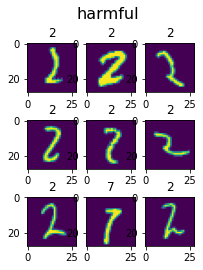

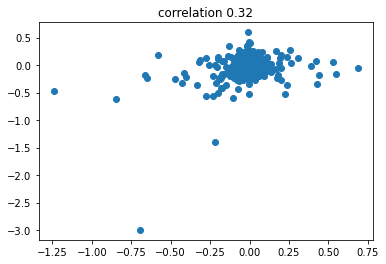

In [65]:
draw_target(f"outputs/mnist/MNIST_1/dev_id_{dev_id_num}/Identity.json")

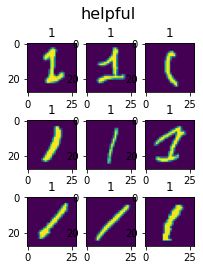

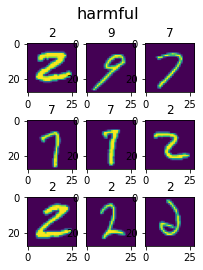

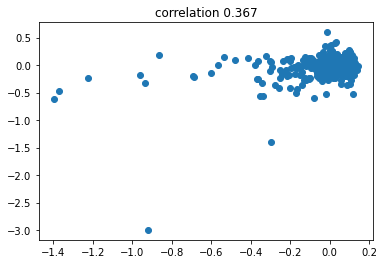

In [67]:
draw_target(f"outputs/mnist/MNIST_1/dev_id_{dev_id_num}/IF_hashmap_IF/epoch299.json")

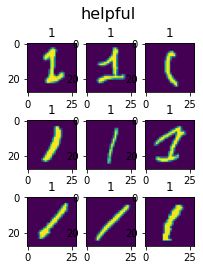

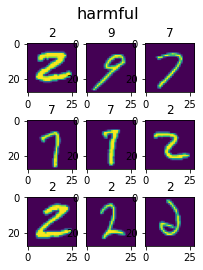

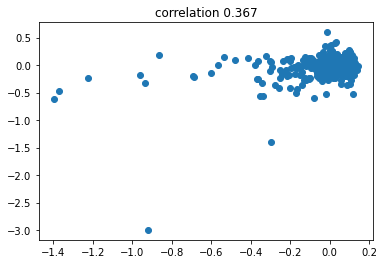

In [72]:
draw_target(f"outputs/mnist/MNIST_1/dev_id_{dev_id_num}/IF_hashmap_IF/epoch299.json")